<a href="https://colab.research.google.com/github/SahibParmar/Person-Re-Identification/blob/main/Different%20model%20tried/Implementation-1/CUHK_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cuhk03:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2588365%2F4419172%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240919%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240919T063830Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D076d096ba4d80cecc2f492a7a211fe08e30f7e01bf3b804b59de81316c87e04de97ff2a7f47af1535a816e6a2a3c79ae54439dab9a2cc4a2889f5487f3f960c97a7623f43b23c829803dd32fa0ab54e15d2d26a66e8825fb034e373f05fdd8494df143a6ae4a3782d5b01eb82876d6e945957479257806b65a234ad59e24c6be2a7408cf39f0a6056578d3ac8dcf70597b43c2ca623f3438dceddbfc561b1c08d86a22be49ca79846f17857a917cd1762895eeefd22ef3d3d161099f74e9af7778ed1201a2c5251044e55a95924bd87d9c08c985fd7142e9e3d2a678b63b95bc2e8ce5bfee3efc86a7e2c5280e99d310a167151c5be543f728aa88c6a2e5cb06'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2891939854 bytes downloaded
Downloaded and uncompressed: cuhk03
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/cuhk03/archive/images_labeled/4_007_2_08.png
/kaggle/input/cuhk03/archive/images_labeled/2_309_2_10.png
/kaggle/input/cuhk03/archive/images_labeled/1_399_2_09.png
/kaggle/input/cuhk03/archive/images_labeled/2_334_2_06.png
/kaggle/input/cuhk03/archive/images_labeled/1_219_2_10.png
/kaggle/input/cuhk03/archive/images_labeled/1_450_1_01.png
/kaggle/input/cuhk03/archive/images_labeled/2_396_1_05.png
/kaggle/input/cuhk03/archive/images_labeled/1_566_2_09.png
/kaggle/input/cuhk03/archive/images_labeled/2_395_2_07.png
/kaggle/input/cuhk03/archive/images_labeled/1_334_2_07.png
/kaggle/input/cuhk03/archive/images_labeled/1_273_2_06.png
/kaggle/input/cuhk03/archive/images_labeled/1_678_2_10.png
/kaggle/input/cuhk03/archive/images_labeled/2_174_1_04.png
/kaggle/input/cuhk03/archive/images_labeled/1_641_2_06.png
/kaggle/input/cuhk03/archive/images_labeled/1_732_1_03.png
/kaggle/input/cuhk03/archive/images_labeled/2_292_1_01.png
/kagg

In [3]:
from matplotlib import pyplot as plt,image as mpimg
from torch.optim import Adam
from torchvision import transforms as transforms
from torchvision.models import resnet50
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader,random_split
import torch.optim as optim
from torchvision.models.resnet import Bottleneck
from PIL import Image

from matplotlib import pyplot as plt,image as mpimg #Make sure you have imported the necessary modules

def display_image(image_path):
    """
    Displays an image using matplotlib.

    Args:
      image_path: Path to the image file.
    """
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off') # Hide axes
    plt.show()

In [4]:
data=pd.read_csv('/kaggle/input/cuhk03/pairs.csv')
# data['label'].count(0)
data['label'].value_counts()[0] ,data['label'].value_counts()[1]

(43438, 42382)

In [5]:
len(data)

85820

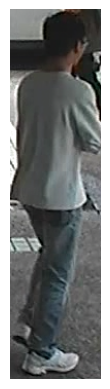

In [6]:
display_image('/kaggle/input/cuhk03/archive/images_labeled/5_032_1_02.png')

In [7]:
data=data.sample(frac=1).reset_index(drop=True) # Shuffles the DataFrame and resets the index

In [8]:
train_data=data.iloc[:int(len(data)*0.7)]
test_data=data.iloc[int(len(data)*0.7):]
val_data=test_data.iloc[int(len(test_data)*0.7):]

len(train_data),len(test_data),len(val_data)

(60073, 25747, 7725)

In [9]:
X_train,y_train=[],[]
for i in range(len(train_data)):
    img1='/kaggle/input/cuhk03/archive/images_labeled/'+train_data.iloc[i,1]
    img2='/kaggle/input/cuhk03/archive/images_labeled/'+train_data.iloc[i,2]
    if img1!=img2:
      X_train.append([img1,img2])
      y_train.append(train_data.iloc[i,3])
print(len(X_train),len(y_train))

X_test,y_test=[],[]
for i in range(len(test_data)):
    img1='/kaggle/input/cuhk03/archive/images_labeled/'+test_data.iloc[i,1]
    img2='/kaggle/input/cuhk03/archive/images_labeled/'+test_data.iloc[i,2]
    if img1!=img2:
      X_test.append([img1,img2])
      y_test.append(test_data.iloc[i,3])
print(len(X_test),len(y_test))


X_val,y_val=[],[]
for i in range(len(val_data)):
    img1='/kaggle/input/cuhk03/archive/images_labeled/'+val_data.iloc[i,1]
    img2='/kaggle/input/cuhk03/archive/images_labeled/'+val_data.iloc[i,2]
    if img1!=img2:
      X_val.append([img1,img2])
      y_val.append(val_data.iloc[i,3])
print(len(X_val),len(y_val))

55107 55107
23665 23665
7110 7110


0 /kaggle/input/cuhk03/archive/images_labeled/1_796_1_04.png /kaggle/input/cuhk03/archive/images_labeled/1_798_1_04.png


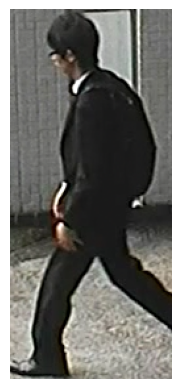

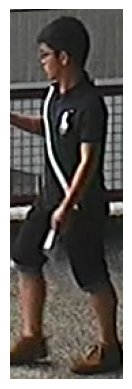

In [10]:
# from re import X
ind=200
print(y_train[ind],X_train[ind][0],X_train[ind][1])
display_image(X_train[ind][0])
display_image(X_train[ind][1])


In [11]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    # transforms.RandomHorizontalFlip(), #Flip the image horizontally randomly
    # transforms.RandomRotation(degrees=10), #Randomly rotates the image by 10 degrees
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


class SiameseDataset(Dataset):
    def __init__(self, X, Y, transform=None):
        self.X = X
        self.Y = Y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        # img1_path, img2_path = self.X[idx]
        img1_path, img2_path = self.X[idx][0], self.X[idx][1]
        img1 = Image.open(img1_path).convert('RGB')
        img2 = Image.open(img2_path).convert('RGB')
        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)
        label = self.Y[idx]
        label = torch.tensor(label, dtype=torch.float32)
        return img1, img2, label


train_dataset = SiameseDataset(X_train,y_train, transform=transform)
test_dataset = SiameseDataset(X_test,y_test, transform=transform)
val_dataset = SiameseDataset(X_val,y_val, transform=transform)



dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=4)

len(dataloader),len(test_dataloader),len(val_dataloader)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


(1723, 740, 223)

In [12]:
device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

#Model Preparation

In [13]:
# class Contrastive_loss_fn(nn.Module):
#     def __init__(self, margin):
#         super(Contrastive_loss_fn, self).__init__()
#         self.margin = torch.tensor(margin, device='cuda') # Specify device for margin

#     def forward(self,output1,output2,label):
#         euclidean_distance=F.pairwise_distance(output1,output2,keepdim=True)
#         loss_contrastive = torch.mean((label)*torch.pow(euclidean_distance, 2) +
#                                      (1-label)*torch.pow(torch.clamp(euclidean_distance, min=self.margin), 2))
#         return loss_contrastive

class Contrastive_loss_fn(nn.Module):
    def __init__(self, margin):
        super(Contrastive_loss_fn, self).__init__()
        self.margin = torch.tensor(margin, device='cuda')

    def forward(self, output1, output2, label):
        cosine_sim = F.cosine_similarity(output1, output2)
        cosine_dist = 1.0-cosine_sim
        loss_contrastive = torch.mean((label) * torch.pow(cosine_dist, 2) +
                                      (1 - label) * torch.pow(torch.clamp(self.margin - cosine_dist, min=0.0), 2))
        return loss_contrastive


class SEBlock(nn.Module):
    def __init__(self, in_channels, reduction_ratio=16):
        super(SEBlock, self).__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excitation = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction_ratio),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction_ratio, in_channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.squeeze(x).view(b, c)
        y = self.excitation(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class SelfAttention(nn.Module):
    def __init__(self, in_dim):
        super(SelfAttention, self).__init__()
        self.query_conv = nn.Conv2d(in_dim, in_dim // 8, kernel_size=1)
        self.key_conv = nn.Conv2d(in_dim, in_dim // 8, kernel_size=1)
        self.value_conv = nn.Conv2d(in_dim, in_dim, kernel_size=1)
        self.softmax = nn.Softmax(dim=-1)


    def forward(self, x):
        batch_size, C, width, height = x.size()
        proj_query = self.query_conv(x).view(batch_size, -1, width * height).permute(0, 2, 1)
        proj_key = self.key_conv(x).view(batch_size, -1, width * height)
        energy = torch.bmm(proj_query, proj_key)
        attention = self.softmax(energy)
        proj_value = self.value_conv(x).view(batch_size, -1, width * height) # 2048x49
        out = torch.bmm(proj_value, attention.permute(0, 2, 1))
        out = out.view(batch_size, C, width, height)
        return out





class SiameseNetwork(nn.Module):
    def __init__(self,model,attention_model):
        super(SiameseNetwork,self).__init__()
        self.encoder_model=model
        self.attention_layer=attention_model
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))  # Add this line
        self.Dence_layer=nn.Linear(2048,1000)
        self.relu=nn.ReLU()


    def encode_one_image(self,input):
        output=self.encoder_model(input)
        output=self.attention_layer(output)
        output = self.global_avg_pool(output)
        output = output.view(output.size(0), -1)
        output=self.Dence_layer(output)
        output=self.relu(output)
        return output

    def forward(self,input1,input2):
        output1 = self.encode_one_image(input1)
        output2 = self.encode_one_image(input2)

        return output1, output2





In [18]:
resnet_model = resnet50(pretrained=True)
modules = []
for child in resnet_model.children():
    modules.append(child)
resnet_model = nn.Sequential(*modules[:-2])




modified_resnet = []
for child in resnet_model.children():

    if isinstance(child, nn.Sequential):
      # print(child)
      for i,block in enumerate(child.children()):
            modified_resnet.append(block)
            if i!=0 and isinstance(block, Bottleneck):
              print("King") # Check if the layer is a Bottleneck block
              modified_resnet.append(SEBlock(block.conv3.out_channels))
    else:
      modified_resnet.append(child)
      # print(f'uppers: {child}')

resnet_model = nn.Sequential(*modified_resnet)

King
King
King
King
King
King
King
King
King
King
King
King


In [19]:
# Initialize the Siamese Network
attention = SelfAttention(2048)
model = SiameseNetwork(resnet_model,attention)
model = model.to(device)
criterion = Contrastive_loss_fn(margin=1)
# optimizer = optim.Adam(model.parameters(), lr=0.00035)
optimizer = optim.SGD(model.parameters(), lr=0.00035, momentum=0.9)

tensor(0.)


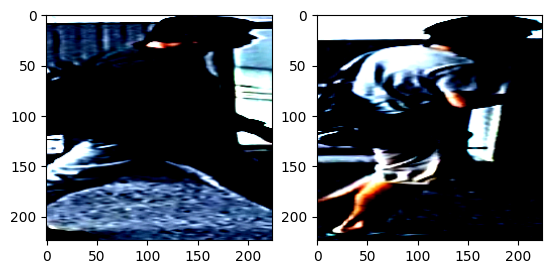

In [20]:
for i,j,l in dataloader:
  #displaying both images
  ind=4
  plt.subplot(1,2,1)
  plt.imshow(i[ind].permute(1,2,0))
  plt.subplot(1,2,2)
  plt.imshow(j[ind].permute(1,2,0))
  print(l[0])
  break

In [21]:
def validate(dataloader,model,criterion):   #Provide test dataloader here
  with torch.no_grad():
        total_loss = 0
        total_correct = 0
        for i, (img1, img2, label) in enumerate(dataloader):
            img1, img2, label = img1.to(device), img2.to(device), label.to(device)
            output1, output2 = model(img1, img2)
            cosine_sim = F.cosine_similarity(output1, output2)
            cosine_dist = 1.0-cosine_sim
            pred=(cosine_dist<=1).float()
            num_correct = (pred == label).sum().item()
            total_correct += num_correct
            loss = criterion(output1, output2, label)
            total_loss += loss.item()
            total_loss += loss.item()
        print(f'validation_loss:{total_loss/len(dataloader)} validation_acuracy:{total_correct*100/len(val_data)}')



def Train_one_epoch(epochs,dataloader,model,criterion):
    for no in range(epochs):
        total_loss = 0

        total_correct = 0
        for i, (img1, img2, label) in enumerate(dataloader):
            img1, img2, label = img1.to(device), img2.to(device), label.to(device)
            output1, output2 = model(img1, img2)

            cosine_sim = F.cosine_similarity(output1, output2)
            cosine_dist = 1.0-cosine_sim
            pred=(cosine_dist<=1).float()
            num_correct = (pred == label).sum().item()
            total_correct+=num_correct

            loss = criterion(output1, output2, label)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            total_loss += loss.item()
            if i % 10 == 0:
              print(f"batch {i+1}, Iteration {i}: Loss = {loss.item()} continuous_acc: {total_correct*100/(32*(i+1))}")
            if i%50==0 and i!=0:
              validate(val_dataloader,model,criterion)
        print(f"Epoch avg Loss = {total_loss/len(dataloader)}")



Train_one_epoch(1,dataloader,model,criterion)

batch 1, Iteration 0: Loss = 0.3121602535247803 continuous_acc: 53.125
batch 11, Iteration 10: Loss = 0.3819873332977295 continuous_acc: 44.60227272727273
batch 21, Iteration 20: Loss = 0.26106956601142883 continuous_acc: 46.13095238095238
batch 31, Iteration 30: Loss = 0.28459489345550537 continuous_acc: 44.354838709677416
batch 41, Iteration 40: Loss = 0.24757644534111023 continuous_acc: 44.207317073170735
batch 51, Iteration 50: Loss = 0.2511630058288574 continuous_acc: 44.424019607843135
validation_loss:0.4881795615358738 validation_acuracy:40.82847896440129
batch 61, Iteration 60: Loss = 0.25713276863098145 continuous_acc: 44.057377049180324
batch 71, Iteration 70: Loss = 0.24263766407966614 continuous_acc: 43.70598591549296
batch 81, Iteration 80: Loss = 0.23493587970733643 continuous_acc: 43.90432098765432
batch 91, Iteration 90: Loss = 0.2535918354988098 continuous_acc: 43.99038461538461
batch 101, Iteration 100: Loss = 0.25585800409317017 continuous_acc: 44.306930693069305
val

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
torch.save(model.state_dict(), '/content/drive/MyDrive/Sahib/Projects/model_parameters.pth')